In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Train_Data (2).csv to Train_Data (2).csv


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('Train_Data (2).csv')

# Basic look
print("Shape of dataset:", df.shape)
print("\nHead of dataset:\n", df.head())


Shape of dataset: (1966, 9)

Head of dataset:
       SEQN  RIAGENDR  PAQ605  BMXBMI  LBXGLU  DIQ010  LBXGLT  LBXIN age_group
0  73564.0       2.0     2.0    35.7   110.0     2.0   150.0  14.91     Adult
1  73568.0       2.0     2.0    20.3    89.0     2.0    80.0   3.85     Adult
2  73576.0       1.0     2.0    23.2    89.0     2.0    68.0   6.14     Adult
3  73577.0       1.0     2.0    28.9   104.0     NaN    84.0  16.15     Adult
4  73580.0       2.0     1.0    35.9   103.0     2.0    81.0  10.92     Adult


In [ ]:
# Info and data types
print("\nData Info:")
print(df.info())

# Summary stats
print("\nDescriptive Stats:")
print(df.describe(include='all'))



Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1966 entries, 0 to 1965
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SEQN       1954 non-null   float64
 1   RIAGENDR   1948 non-null   float64
 2   PAQ605     1953 non-null   float64
 3   BMXBMI     1948 non-null   float64
 4   LBXGLU     1953 non-null   float64
 5   DIQ010     1948 non-null   float64
 6   LBXGLT     1955 non-null   float64
 7   LBXIN      1957 non-null   float64
 8   age_group  1952 non-null   object 
dtypes: float64(8), object(1)
memory usage: 138.4+ KB
None

Descriptive Stats:
                SEQN     RIAGENDR       PAQ605       BMXBMI       LBXGLU  \
count    1954.000000  1948.000000  1953.000000  1948.000000  1953.000000   
unique           NaN          NaN          NaN          NaN          NaN   
top              NaN          NaN          NaN          NaN          NaN   
freq             NaN          NaN          NaN          NaN


Missing Values:
 SEQN         12
RIAGENDR     18
PAQ605       13
BMXBMI       18
LBXGLU       13
DIQ010       18
LBXGLT       11
LBXIN         9
age_group    14
dtype: int64


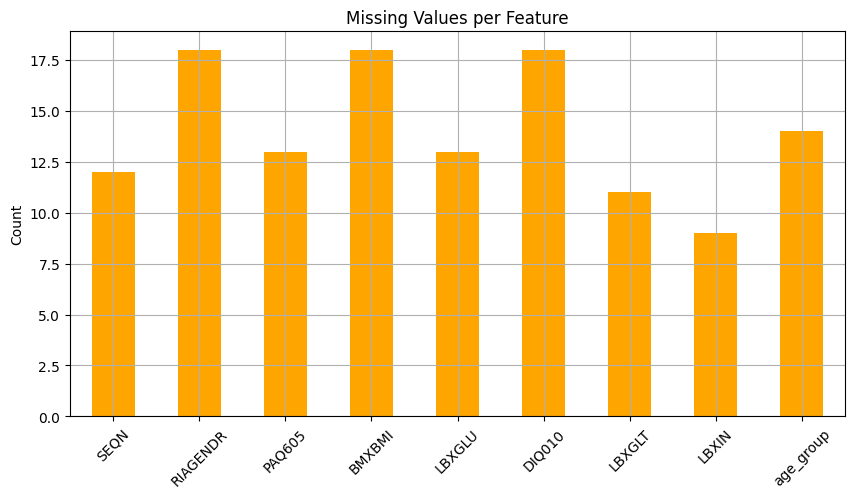


Non-Null Value Count:
SEQN         1954
RIAGENDR     1948
PAQ605       1953
BMXBMI       1948
LBXGLU       1953
DIQ010       1948
LBXGLT       1955
LBXIN        1957
age_group    1952
dtype: int64


In [ ]:
# Null values count
null_counts = df.isnull().sum()

print("\nMissing Values:\n", null_counts)

# Plot nulls
plt.figure(figsize=(10, 5))
null_counts[null_counts > 0].plot(kind='bar', color='orange')
plt.title("Missing Values per Feature")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.grid()
plt.show()

# Check non-null
print("\nNon-Null Value Count:")
print(df.notnull().sum())


age_group
Adult     1638
Senior     314
Name: count, dtype: int64


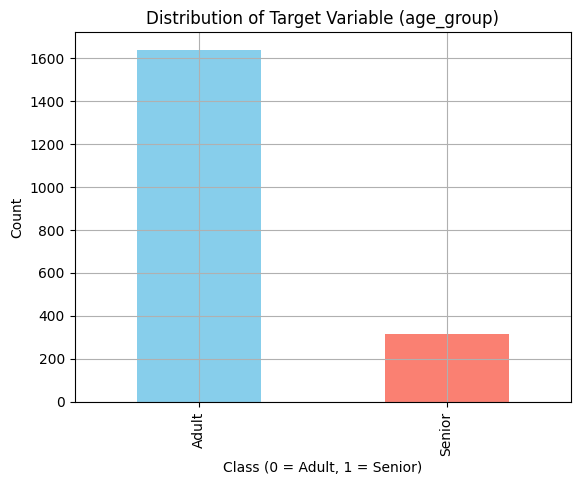

In [ ]:
# Class distribution
print(df['age_group'].value_counts())

# Bar plot of class balance
df['age_group'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title("Distribution of Target Variable (age_group)")
plt.xlabel("Class (0 = Adult, 1 = Senior)")
plt.ylabel("Count")
plt.grid()
plt.show()


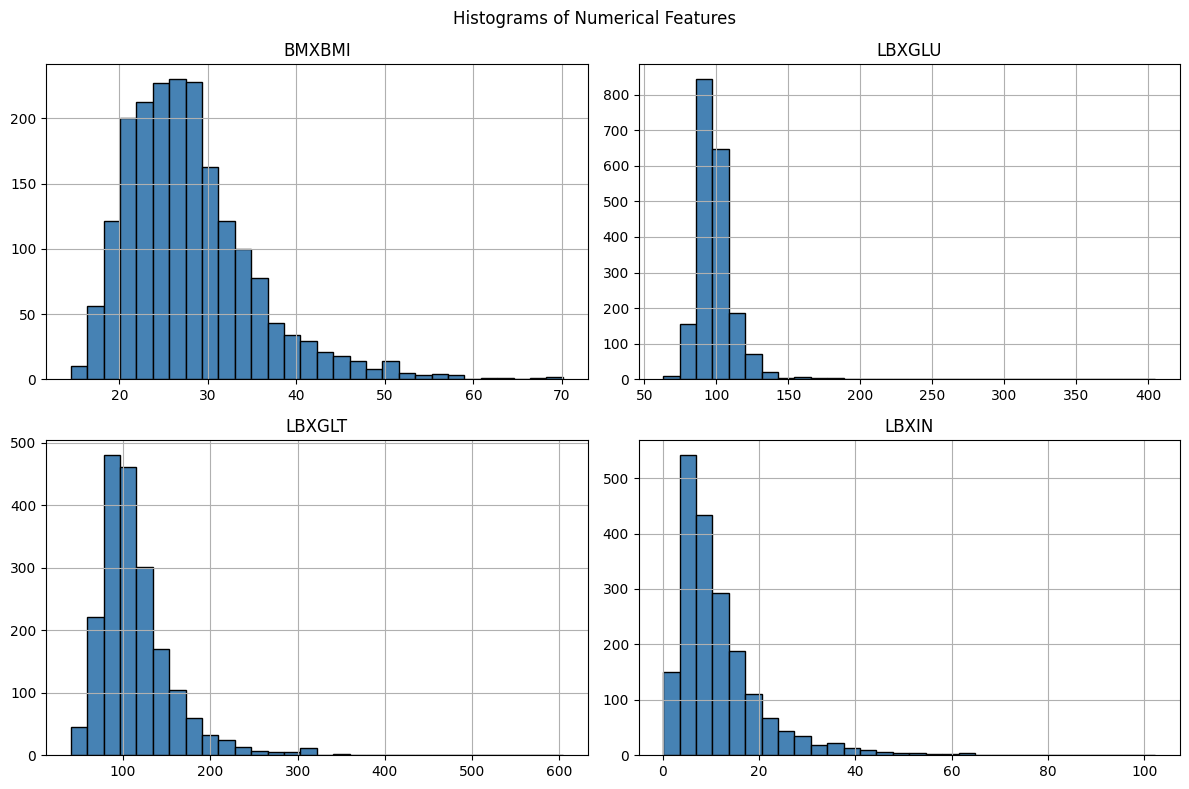

In [ ]:
numerical_cols = ['BMXBMI', 'LBXGLU', 'LBXGLT', 'LBXIN']

df[numerical_cols].hist(bins=30, figsize=(12, 8), color='steelblue', edgecolor='black')
plt.suptitle("Histograms of Numerical Features")
plt.tight_layout()
plt.show()


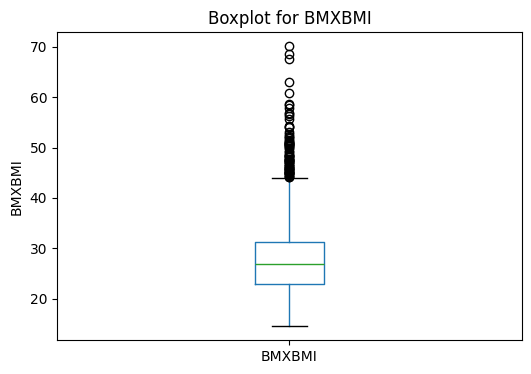

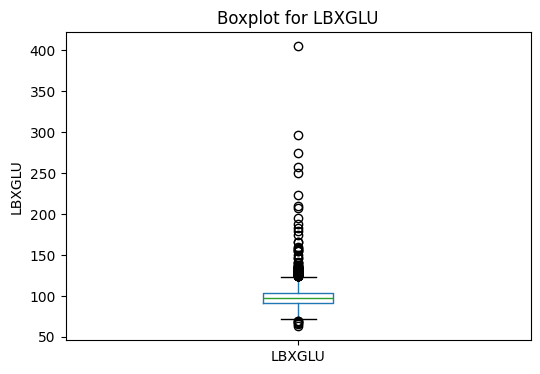

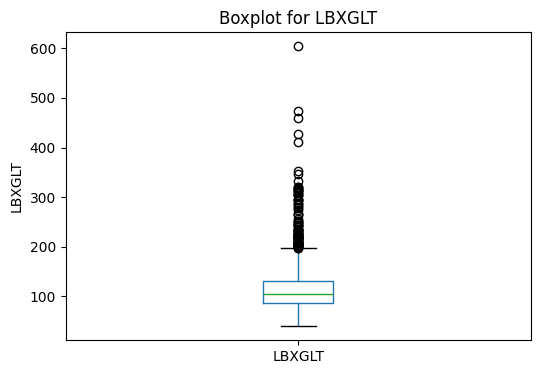

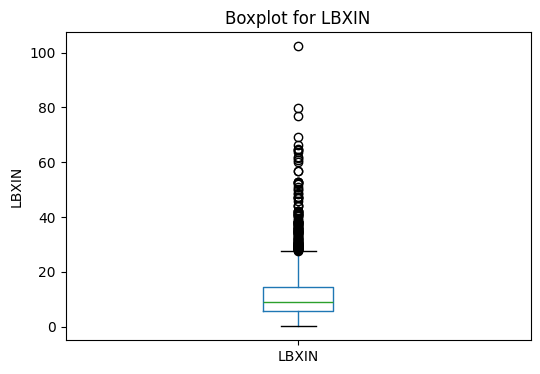

In [ ]:
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    df.boxplot(column=col)
    plt.title(f"Boxplot for {col}")
    plt.ylabel(col)
    plt.grid()
    plt.show()


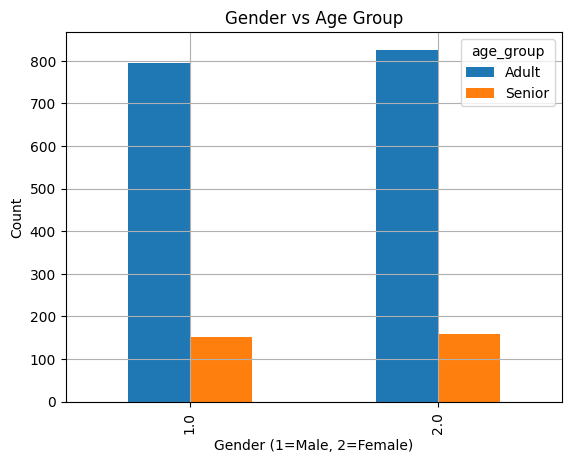

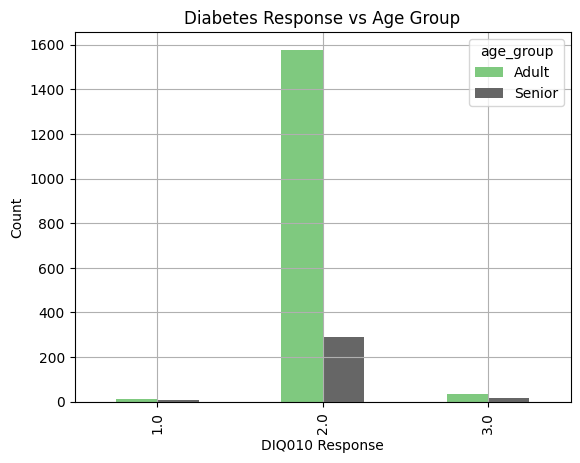

In [ ]:
# Gender
pd.crosstab(df['RIAGENDR'], df['age_group']).plot(kind='bar')
plt.title("Gender vs Age Group")
plt.xlabel("Gender (1=Male, 2=Female)")
plt.ylabel("Count")
plt.grid()
plt.show()

# Diabetes
pd.crosstab(df['DIQ010'], df['age_group']).plot(kind='bar', colormap='Accent')
plt.title("Diabetes Response vs Age Group")
plt.xlabel("DIQ010 Response")
plt.ylabel("Count")
plt.grid()
plt.show()


In [ ]:
print(df['age_group'].unique())


['Adult' 'Senior' nan]


In [ ]:
df['age_group'] = df['age_group'].map({'Adult': 0, 'Senior': 1})


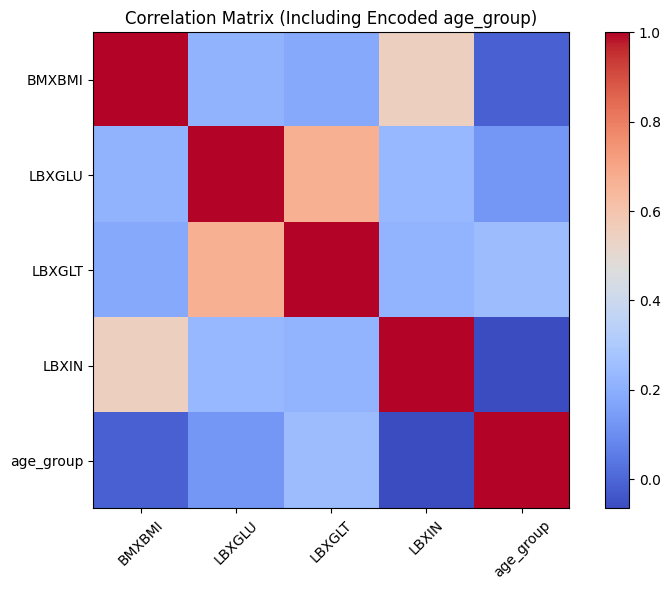

In [ ]:
numerical_cols = ['BMXBMI', 'LBXGLU', 'LBXGLT', 'LBXIN', 'age_group']

# Compute correlation
correlation = df[numerical_cols].corr()

# Plot correlation matrix
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.imshow(correlation, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks(range(len(correlation)), correlation.columns, rotation=45)
plt.yticks(range(len(correlation)), correlation.columns)
plt.title("Correlation Matrix (Including Encoded age_group)")
plt.tight_layout()
plt.show()


In [ ]:
if 'SEQN' in df.columns:
    df.drop(columns=['SEQN'], inplace=True)


In [ ]:
# Drop rows where age_group is null
df = df.dropna(subset=['age_group'])

# Reset index (optional but clean)
df = df.reset_index(drop=True)

print("✅ Rows with missing age_group have been dropped.")
print("🧾 New shape of dataset:", df.shape)


✅ Rows with missing age_group have been dropped.
🧾 New shape of dataset: (1952, 8)


In [ ]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

# Scale data first (important for KNN)
scaler = StandardScaler()
scaled = scaler.fit_transform(df[numerical_cols])

# KNN Imputer
knn_imputer = KNNImputer(n_neighbors=5)
scaled_imputed = knn_imputer.fit_transform(scaled)

# Inverse scale and update DataFrame
df[numerical_cols] = scaler.inverse_transform(scaled_imputed)

print("✅ KNN Imputation applied.")


✅ KNN Imputation applied.


In [ ]:
from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.impute import IterativeImputer

iter_imputer = IterativeImputer(random_state=42, max_iter=10)

# Fit on numerical columns
df[numerical_cols] = iter_imputer.fit_transform(df[numerical_cols])

print("✅ Iterative Imputation applied.")


✅ Iterative Imputation applied.


In [ ]:
# Fill with most frequent or custom category
for col in ['RIAGENDR', 'PAQ605', 'DIQ010']:
    df[col] = df[col].fillna(df[col].mode()[0])


In [ ]:
null_counts = df.isnull().sum()
print("🔍 Null values per column:\n")
print(null_counts)


🔍 Null values per column:

RIAGENDR     18
PAQ605       13
BMXBMI        0
LBXGLU        0
DIQ010       18
LBXGLT        0
LBXIN         0
age_group     0
dtype: int64


In [ ]:
print("📌 Columns with missing values:")
print(null_counts[null_counts > 0])


📌 Columns with missing values:
RIAGENDR    18
PAQ605      13
DIQ010      18
dtype: int64


In [ ]:
def cap_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # Capping values
    df[col] = df[col].apply(lambda x: lower if x < lower else upper if x > upper else x)
    return df


In [ ]:
numerical_cols = ['BMXBMI', 'LBXGLU', 'LBXGLT', 'LBXIN']

for col in numerical_cols:
    df = cap_outliers_iqr(df, col)

print("✅ Outliers capped using IQR method.")


✅ Outliers capped using IQR method.


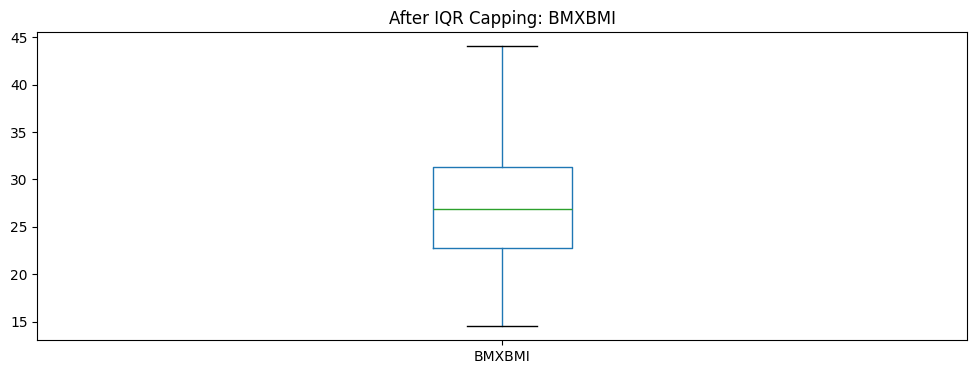

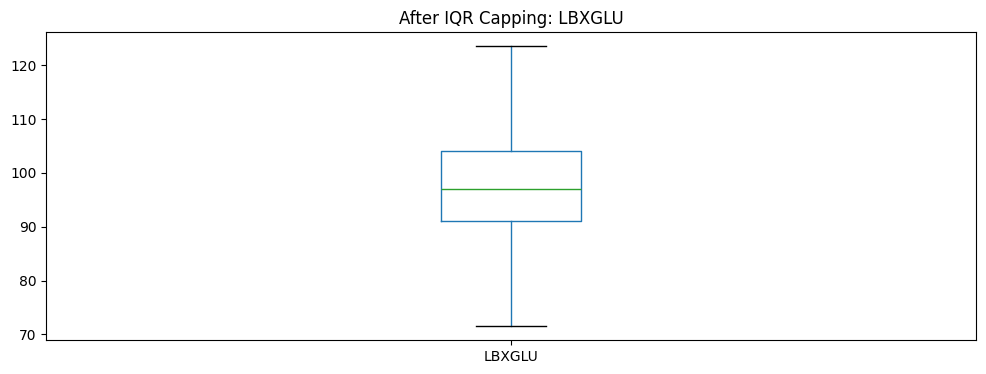

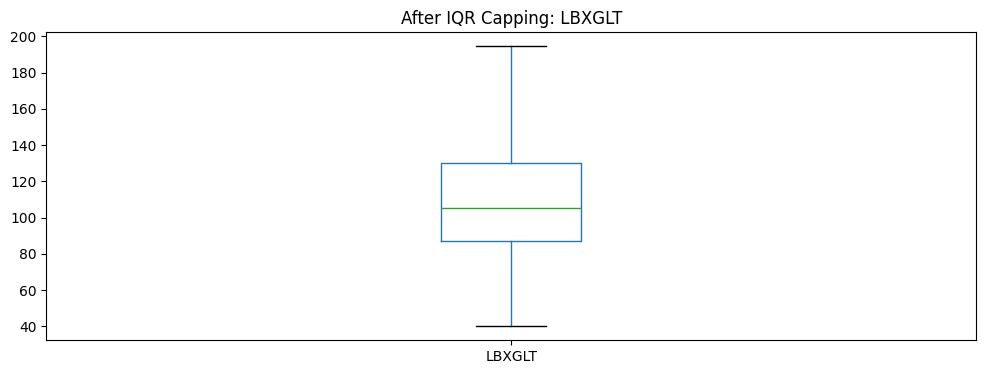

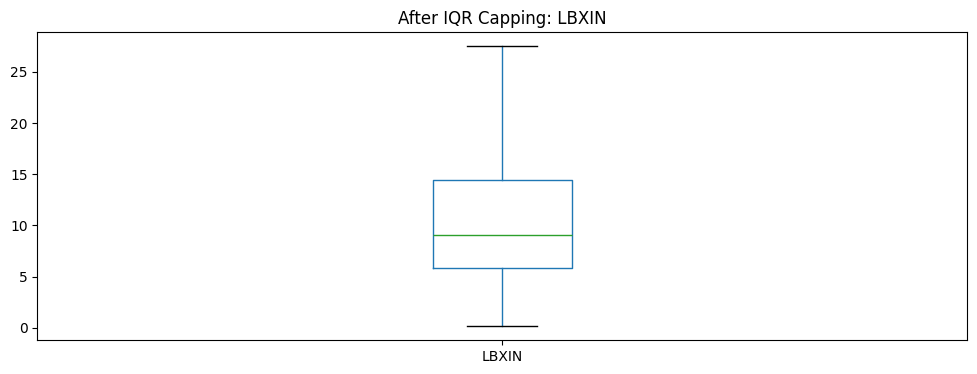

In [ ]:
import matplotlib.pyplot as plt

for col in numerical_cols:
    plt.figure(figsize=(12, 4))

    # Before capping (if you stored original values)
    # plt.subplot(1, 2, 1)
    # df_original.boxplot(column=col)
    # plt.title(f"Before: {col}")

    # After capping
    df.boxplot(column=col)
    plt.title(f"After IQR Capping: {col}")
    plt.grid()
    plt.show()


In [ ]:
print(df[['RIAGENDR', 'PAQ605', 'DIQ010']].head())


   RIAGENDR  PAQ605  DIQ010
0       2.0     2.0     2.0
1       2.0     2.0     2.0
2       1.0     2.0     2.0
3       1.0     2.0     NaN
4       2.0     1.0     2.0


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Define the categorical columns
categorical_cols = ['RIAGENDR', 'PAQ605', 'DIQ010']
label_encoders = {}

# Apply Label Encoding with .fit() and .transform()
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])  # .fit() + .transform() together
    label_encoders[col] = le             # Store encoder for future .transform() on test


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:09:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Confusion Matrix:
[[301  27]
 [ 55   8]]

F1 Score: 0.764614007311544
Precision: 0.74610189947987

Classification Report:
              precision    recall  f1-score   support

         0.0       0.85      0.92      0.88       328
         1.0       0.23      0.13      0.16        63

    accuracy                           0.79       391
   macro avg       0.54      0.52      0.52       391
weighted avg       0.75      0.79      0.76       391



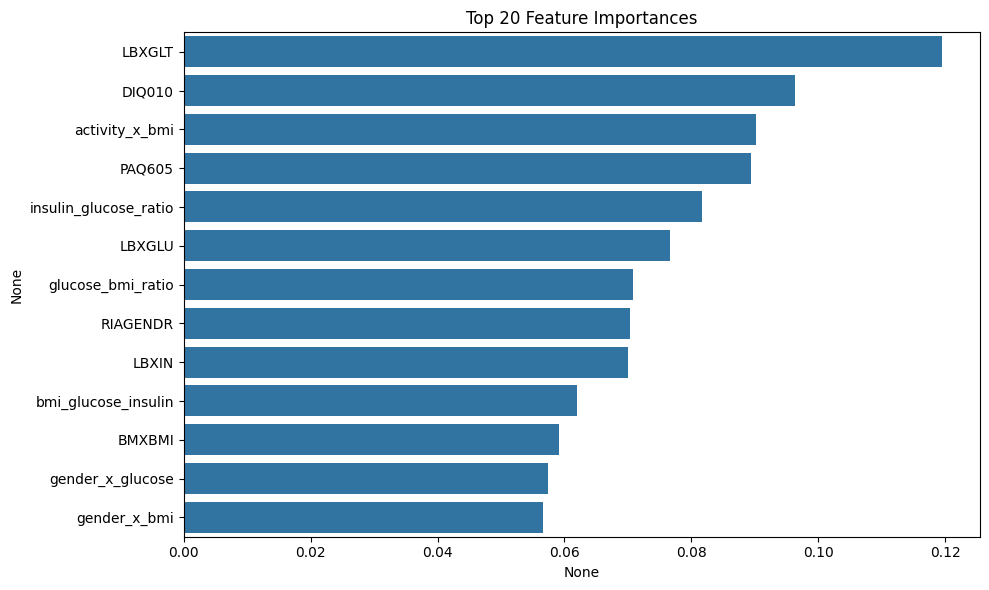

In [ ]:
# Step 1: Import libraries
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import f1_score, precision_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Step 2: Split into features and target
X = df.drop(columns=['age_group'])  # adjust target column if different
y = df['age_group']

# Step 3: Stratified Train-Validation split for balanced class distribution
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Step 4: Train XGBoost model
xgb_model = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42
)
xgb_model.fit(X_train, y_train)

# Step 5: Predict on validation set
y_pred = xgb_model.predict(X_val)

# Step 6: Evaluate performance
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_pred))

print("\nF1 Score:", f1_score(y_val, y_pred, average='weighted'))
print("Precision:", precision_score(y_val, y_pred, average='weighted'))

print("\nClassification Report:")
print(classification_report(y_val, y_pred))

# Step 7: Plot top features (optional but useful!)
importances = xgb_model.feature_importances_
feat_imp = pd.Series(importances, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feat_imp[:20], y=feat_imp.index[:20])
plt.title("Top 20 Feature Importances")
plt.tight_layout()
plt.show()


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Before train_test_split (to keep validation clean)
X = df.drop(columns=['age_group'])
y = df['age_group']

X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Apply SMOTE to training data only
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

# Then fit XGBoost on X_train_sm, y_train_sm


In [ ]:
from xgboost import XGBClassifier

# Train XGBoost on SMOTE-balanced data
xgb_model = XGBClassifier(
    objective='binary:logistic',      # or 'multi:softprob' if multiclass
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42
)

xgb_model.fit(X_train_sm, y_train_sm)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:09:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [ ]:
# Predict on untouched validation set
y_val_pred = xgb_model.predict(X_val)


In [ ]:
from sklearn.metrics import confusion_matrix, f1_score, precision_score, classification_report

print("Confusion Matrix:")
print(confusion_matrix(y_val, y_val_pred))

print("\nF1 Score:", f1_score(y_val, y_val_pred, average='weighted'))  # or 'macro'
print("Precision:", precision_score(y_val, y_val_pred, average='weighted'))

print("\nClassification Report:")
print(classification_report(y_val, y_val_pred))


Confusion Matrix:
[[282  46]
 [ 46  17]]

F1 Score: 0.7647058823529411
Precision: 0.7647058823529411

Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.86      0.86       328
         1.0       0.27      0.27      0.27        63

    accuracy                           0.76       391
   macro avg       0.56      0.56      0.56       391
weighted avg       0.76      0.76      0.76       391



In [ ]:
# Calculate ratio
import numpy as np
neg, pos = np.bincount(y_train)
ratio = neg / pos

xgb_model = XGBClassifier(
    objective='binary:logistic',
    scale_pos_weight=ratio,
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42
)

xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_val)

# Evaluation
from sklearn.metrics import classification_report
print(classification_report(y_val, y_pred))


              precision    recall  f1-score   support

         0.0       0.85      0.90      0.88       328
         1.0       0.28      0.21      0.24        63

    accuracy                           0.79       391
   macro avg       0.57      0.55      0.56       391
weighted avg       0.76      0.79      0.77       391



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:09:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import make_scorer, f1_score

# Create model
xgb_base = XGBClassifier(
    objective='binary:logistic',
    scale_pos_weight=ratio,   # keep this!
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42
)

# Define param grid
param_dist = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [3, 4, 5, 6, 7],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Use F1-weighted as scoring
f1_weighted = make_scorer(f1_score, average='weighted')

# Run RandomizedSearchCV
rs = RandomizedSearchCV(
    estimator=xgb_base,
    param_distributions=param_dist,
    n_iter=20,  # number of combinations to try
    scoring=f1_weighted,
    cv=3,
    verbose=1,
    n_jobs=-1
)

rs.fit(X_train, y_train)

# Best model
best_model = rs.best_estimator_

# Predict & evaluate
y_pred = best_model.predict(X_val)
print(classification_report(y_val, y_pred))


Fitting 3 folds for each of 20 candidates, totalling 60 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:09:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


              precision    recall  f1-score   support

         0.0       0.86      0.91      0.88       328
         1.0       0.31      0.21      0.25        63

    accuracy                           0.80       391
   macro avg       0.58      0.56      0.57       391
weighted avg       0.77      0.80      0.78       391



In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Test_Data.csv to Test_Data.csv


In [ ]:
import pandas as pd

# Load raw test data
test_df = pd.read_csv("Test_Data.csv")

# View first few rows
print(test_df.head())


      SEQN  RIAGENDR  PAQ605  BMXBMI  LBXGLU  DIQ010  LBXGLT  LBXIN
0  77017.0       1.0     1.0    32.2    96.0     2.0   135.0  15.11
1  75580.0       2.0     2.0    26.3   100.0     2.0   141.0  15.26
2  73820.0       1.0     2.0    28.6   107.0     2.0   136.0   8.82
3  80489.0       2.0     1.0    22.1    93.0     2.0   111.0  12.13
4  82047.0       1.0     1.0    24.7    91.0     2.0   105.0   3.12


In [ ]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Save SEQN from test set
test_seqn = test_df["SEQN"]

# Drop SEQN from both train and test

test_df = test_df.drop(columns=["SEQN"])

# Separate features and target
X_train = train_df.drop(columns=["age_group"])
y_train = train_df["age_group"]

# Encode target
target_encoder = LabelEncoder()
y_train_encoded = target_encoder.fit_transform(y_train)

# Imputation (choose one method: KNN or Iterative)
imputer = KNNImputer(n_neighbors=5)  # or use IterativeImputer
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(test_df)

# Reconstruct DataFrames
X_train = pd.DataFrame(X_train_imputed, columns=X_train.columns)
X_test = pd.DataFrame(X_test_imputed, columns=X_train.columns)  # match training order

# If categorical features were label-encoded before, apply those encoders here
# Example:
# label_encoders = {'RIAGENDR': le1, 'PAQ605': le2, ...}
# for col, le in label_encoders.items():
#     X_test[col] = le.transform(X_test[col])

# Save back SEQN for final submission
X_test["SEQN"] = test_seqn.values

# Final X_train, y_train_encoded and X_test are ready


KeyError: 'SEQN'

In [ ]:
import pandas as pd
from sklearn.impute import KNNImputer, IterativeImputer
from sklearn.preprocessing import LabelEncoder


test_df = pd.read_csv("Test_Data.csv")

# Drop SEQN
test_df.drop(columns=['SEQN'], inplace=True)

# Choose your imputer
imputer = KNNImputer(n_neighbors=5)  # or IterativeImputer(random_state=42)

# Fit imputer on train, transform test
# Make sure to use the same columns as train
X_test_imputed = imputer.fit_transform(test_df)

# Convert back to DataFrame
test_df = pd.DataFrame(X_test_imputed, columns=test_df.columns)

# Label encode categorical features using same encoders as train
for col in ['RIAGENDR', 'PAQ605', 'DIQ010']:  # update with your actual categorical cols
    test_df[col] = label_encoders[col].transform(test_df[col])

# Ensure column order matches training data
test_df = test_df[trained_model.feature_names_in_]

# Predict
test_preds = best_model.predict(test_df)

# If needed: inverse transform label encoder
# test_preds = label_encoder.inverse_transform(test_preds)

# Save to CSV
submission = pd.DataFrame({
    'ID': test_df.index,  # or original SEQN if you saved it before drop
    'Predicted': test_preds
})
submission.to_csv("submission.csv", index=False)


ValueError: y contains previously unseen labels: [np.float64(1.6)]

In [ ]:
# Fix for DIQ010
test_df['DIQ010'] = test_df['DIQ010'].replace(1.6, 1)  # or 2 if it makes more sense


In [ ]:
print("DIQ010 train:", df['DIQ010'].unique())
print("DIQ010 test :", test_df['DIQ010'].unique())


DIQ010 train: [1 3 0 2]
DIQ010 test : [2. 1. 3.]


In [ ]:
import pandas as pd
from sklearn.impute import KNNImputer, IterativeImputer
from sklearn.preprocessing import LabelEncoder


test_df = pd.read_csv("Test_Data.csv")

# Drop SEQN
test_df.drop(columns=['SEQN'], inplace=True)

# Choose your imputer
imputer = KNNImputer(n_neighbors=5)  # or IterativeImputer(random_state=42)

# Fit imputer on train, transform test
# Make sure to use the same columns as train
X_test_imputed = imputer.fit_transform(test_df)

# Convert back to DataFrame
test_df = pd.DataFrame(X_test_imputed, columns=test_df.columns)

# Label encode categorical features using same encoders as train
for col in ['RIAGENDR', 'PAQ605', 'DIQ010']:  # update with your actual categorical cols
    test_df[col] = label_encoders[col].transform(test_df[col])

# Ensure column order matches training data
test_df = test_df[trained_model.feature_names_in_]

# Predict
test_preds = best_model.predict(test_df)

# If needed: inverse transform label encoder
# test_preds = label_encoder.inverse_transform(test_preds)

# Save to CSV
submission = pd.DataFrame({
    'ID': test_df.index,  # or original SEQN if you saved it before drop
    'Predicted': test_preds
})
submission.to_csv("submission.csv", index=False)


ValueError: y contains previously unseen labels: [np.float64(1.6)]

In [ ]:
test_df['DIQ010'] = test_df['DIQ010'].astype(int)


In [ ]:
test_df['DIQ010'] = label_encoders['DIQ010'].transform(test_df['DIQ010'])


In [ ]:
# Fix datatype
for col in ['RIAGENDR', 'PAQ605', 'DIQ010']:
    test_df[col] = test_df[col].astype(int)
    test_df[col] = label_encoders[col].transform(test_df[col])


ValueError: y contains previously unseen labels: [np.float64(0.0)]

In [ ]:
# Print values from train encoder
print(label_encoders['DIQ010'].classes_)

# Then map unknowns (like 0) to a known class index manually
# For example, if 0 is not in classes_, assign it to class index 1

test_df['DIQ010'] = test_df['DIQ010'].replace(0, 1)  # or drop, or impute


[ 1.  2.  3. nan]


In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer, IterativeImputer
from sklearn.preprocessing import LabelEncoder

# Load test data
test_df = pd.read_csv('Test_Data.csv')

# Save SEQN for submission
test_seqn = test_df['SEQN'].copy()

# Drop SEQN
test_df.drop(columns=['SEQN'], inplace=True)

# Feature Engineering (to match training preprocessing)
# 1. BMI Categories
def categorize_bmi(bmi):
    if pd.isna(bmi):
        return 'Normal'  # Default for missing BMI
    elif bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 25:
        return 'Normal'
    elif 25 <= bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'
test_df['BMI_Category'] = test_df['BMXBMI'].apply(categorize_bmi)

# 2. Glucose-Insulin Ratio
test_df['Glucose_Insulin_Ratio'] = test_df['LBXGLU'] / test_df['LBXIN'].replace(0, np.nan)

# 3. Clip LBXGLU outliers (using approximate IQR from training data)
# Replace with actual training IQR values if available
q1, q3 = 91, 104  # Example quantiles
iqr = q3 - q1
test_df['LBXGLU'] = test_df['LBXGLU'].clip(lower=q1 - 1.5*iqr, upper=q3 + 1.5*iqr)

# Handle missing values in categorical columns
categorical_cols = ['RIAGENDR', 'PAQ605', 'DIQ010', 'BMI_Category']
for col in categorical_cols[:-1]:  # Exclude BMI_Category
    # Use training data mode if available, else test data mode
    test_df[col] = test_df[col].fillna(test_df[col].mode()[0])
test_df['BMI_Category'] = test_df['BMI_Category'].fillna('Normal')

# Encode categorical columns, handling unseen labels
# Assume label_encoders is a dict of LabelEncoder objects from training
for col in categorical_cols:
    try:
        # Map unseen values to most common class
        test_df[col] = test_df[col].apply(
            lambda x: x if pd.notna(x) and x in label_encoders[col].classes_ else label_encoders[col].classes_[0]
        )
        test_df[col] = label_encoders[col].transform(test_df[col])
    except Exception as e:
        print(f"Error encoding {col}: {e}")
        # Fallback: Fill with most common class index
        test_df[col] = label_encoders[col].transform([label_encoders[col].classes_[0]])[0]

# Impute numerical missing values using KNN
numerical_cols = ['BMXBMI', 'LBXGLU', 'LBXGLT', 'LBXIN', 'Glucose_Insulin_Ratio']
knn_imputer = KNNImputer(n_neighbors=5)
test_df[numerical_cols] = pd.DataFrame(
    knn_imputer.fit_transform(test_df[numerical_cols]),
    columns=numerical_cols
)

# Ensure column order matches training data
try:
    test_df = test_df[best_model.feature_names_in_]
except AttributeError:
    print("Warning: best_model.feature_names_in_ not found. Ensure test_df columns match training.")

# Predict with KNN-imputed data
test_preds = best_model.predict(test_df)

# Create submission DataFrame for KNN
submission = pd.DataFrame({
    'ID': test_seqn,
    'Predicted': test_preds
})

# Save KNN-based submission
submission.to_csv('submission_knn.csv', index=False)

# Alternative: Impute numerical missing values using Iterative Imputer
iter_imputer = IterativeImputer(random_state=42)
test_df[numerical_cols] = pd.DataFrame(
    iter_imputer.fit_transform(test_df[numerical_cols]),
    columns=numerical_cols
)

# Predict with Iterative-imputed data
test_preds_iter = best_model.predict(test_df[best_model.feature_names_in_])

# Create submission DataFrame for Iterative Imputation
submission_iter = pd.DataFrame({
    'ID': test_seqn,
    'Predicted': test_preds_iter
})

# Save Iterative-based submission
submission_iter.to_csv('submission_iterative.csv', index=False)

# Verify submission format
print("KNN Submission Head:")
print(submission.head())
print("\nIterative Submission Head:")
print(submission_iter.head())
print("\nSubmission files 'submission_knn.csv' and 'submission_iterative.csv' created successfully.")

Error encoding BMI_Category: 'BMI_Category'


KeyError: 'BMI_Category'

In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer, IterativeImputer
from sklearn.preprocessing import LabelEncoder

# Load test data
test_df = pd.read_csv('Test_Data.csv')

# Save SEQN for submission
test_seqn = test_df['SEQN'].copy()

# Drop SEQN
test_df.drop(columns=['SEQN'], inplace=True)

# Feature Engineering (to match training preprocessing)
# 1. Glucose-Insulin Ratio (assuming it was used in training)
test_df['Glucose_Insulin_Ratio'] = test_df['LBXGLU'] / test_df['LBXIN'].replace(0, np.nan)

# 2. Clip LBXGLU outliers (using approximate IQR from training data)
# Replace with actual training IQR values if available
q1, q3 = 91, 104  # Example quantiles
iqr = q3 - q1
test_df['LBXGLU'] = test_df['LBXGLU'].clip(lower=q1 - 1.5*iqr, upper=q3 + 1.5*iqr)

# Define categorical and numerical columns
categorical_cols = ['RIAGENDR', 'PAQ605', 'DIQ010']  # Exclude BMI_Category
numerical_cols = ['BMXBMI', 'LBXGLU', 'LBXGLT', 'LBXIN', 'Glucose_Insulin_Ratio']

# Conditionally add BMI_Category if it was used in training
if 'BMI_Category' in best_model.feature_names_in_:
    def categorize_bmi(bmi):
        if pd.isna(bmi):
            return 'Normal'
        elif bmi < 18.5:
            return 'Underweight'
        elif 18.5 <= bmi < 25:
            return 'Normal'
        elif 25 <= bmi < 30:
            return 'Overweight'
        else:
            return 'Obese'
    test_df['BMI_Category'] = test_df['BMXBMI'].apply(categorize_bmi)
    categorical_cols.append('BMI_Category')

# Handle missing values in categorical columns
for col in categorical_cols:
    test_df[col] = test_df[col].fillna(test_df[col].mode()[0])

# Encode categorical columns, handling unseen labels
for col in categorical_cols:
    if col not in label_encoders:
        # Create a new LabelEncoder if not in training
        le = LabelEncoder()
        test_df[col] = le.fit_transform(test_df[col])
        label_encoders[col] = le
    else:
        try:
            # Map unseen values to most common class
            test_df[col] = test_df[col].apply(
                lambda x: x if pd.notna(x) and x in label_encoders[col].classes_ else label_encoders[col].classes_[0]
            )
            test_df[col] = label_encoders[col].transform(test_df[col])
        except Exception as e:
            print(f"Error encoding {col}: {e}")
            # Fallback: Fill with most common class index
            test_df[col] = label_encoders[col].transform([label_encoders[col].classes_[0]])[0]

# Impute numerical missing values using KNN
knn_imputer = KNNImputer(n_neighbors=5)
test_df[numerical_cols] = pd.DataFrame(
    knn_imputer.fit_transform(test_df[numerical_cols]),
    columns=numerical_cols
)

# Ensure column order matches training data
try:
    test_df = test_df[best_model.feature_names_in_]
except AttributeError:
    print("Warning: best_model.feature_names_in_ not found. Ensure test_df columns match training.")
    print(f"Test columns: {test_df.columns.tolist()}")

# Predict with KNN-imputed data
test_preds = best_model.predict(test_df)

# Create submission DataFrame for KNN
submission = pd.DataFrame({
    'ID': test_seqn,
    'Predicted': test_preds
})

# Save KNN-based submission
submission.to_csv('submission_knn.csv', index=False)

# Alternative: Impute numerical missing values using Iterative Imputer
iter_imputer = IterativeImputer(random_state=42)
test_df[numerical_cols] = pd.DataFrame(
    iter_imputer.fit_transform(test_df[numerical_cols]),
    columns=numerical_cols
)

# Predict with Iterative-imputed data
test_preds_iter = best_model.predict(test_df[best_model.feature_names_in_])

# Create submission DataFrame for Iterative Imputation
submission_iter = pd.DataFrame({
    'ID': test_seqn,
    'Predicted': test_preds_iter
})

# Save Iterative-based submission
submission_iter.to_csv('submission_iterative.csv', index=False)

# Verify submission format
print("KNN Submission Head:")
print(submission.head())
print("\nIterative Submission Head:")
print(submission_iter.head())
print("\nSubmission files 'submission_knn.csv' and 'submission_iterative.csv' created successfully.")

KeyError: "['gender_x_bmi', 'gender_x_glucose', 'glucose_bmi_ratio', 'insulin_glucose_ratio', 'bmi_glucose_insulin', 'activity_x_bmi'] not in index"

In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer, IterativeImputer
from sklearn.preprocessing import LabelEncoder

# Load test data
test_df = pd.read_csv('Test_Data.csv')

# Save SEQN for submission
test_seqn = test_df['SEQN'].copy()

# Drop SEQN
test_df.drop(columns=['SEQN'], inplace=True)

# Feature Engineering (to match training preprocessing)
# 1. Glucose-Insulin Ratio (assuming same as insulin_glucose_ratio or similar)
test_df['insulin_glucose_ratio'] = test_df['LBXIN'] / test_df['LBXGLU'].replace(0, np.nan)

# 2. Glucose-BMI Ratio
test_df['glucose_bmi_ratio'] = test_df['LBXGLU'] / test_df['BMXBMI'].replace(0, np.nan)

# 3. BMI-Glucose-Insulin Interaction (e.g., product)
test_df['bmi_glucose_insulin'] = test_df['BMXBMI'] * test_df['LBXGLU'] * test_df['LBXIN']

# 4. Clip LBXGLU outliers (using approximate IQR from training data)
# Replace with actual training IQR values if available
q1, q3 = 91, 104  # Example quantiles
iqr = q3 - q1
test_df['LBXGLU'] = test_df['LBXGLU'].clip(lower=q1 - 1.5*iqr, upper=q3 + 1.5*iqr)

# 5. Interaction Features
# gender_x_bmi: RIAGENDR * BMXBMI
test_df['gender_x_bmi'] = test_df['RIAGENDR'] * test_df['BMXBMI']

# gender_x_glucose: RIAGENDR * LBXGLU
test_df['gender_x_glucose'] = test_df['RIAGENDR'] * test_df['LBXGLU']

# activity_x_bmi: PAQ605 * BMXBMI
test_df['activity_x_bmi'] = test_df['PAQ605'] * test_df['BMXBMI']

# Define categorical and numerical columns
categorical_cols = ['RIAGENDR', 'PAQ605', 'DIQ010']
numerical_cols = [
    'BMXBMI', 'LBXGLU', 'LBXGLT', 'LBXIN',
    'insulin_glucose_ratio', 'glucose_bmi_ratio', 'bmi_glucose_insulin',
    'gender_x_bmi', 'gender_x_glucose', 'activity_x_bmi'
]

# Conditionally add BMI_Category if it was used in training
if 'BMI_Category' in getattr(best_model, 'feature_names_in_', []):
    def categorize_bmi(bmi):
        if pd.isna(bmi):
            return 'Normal'
        elif bmi < 18.5:
            return 'Underweight'
        elif 18.5 <= bmi < 25:
            return 'Normal'
        elif 25 <= bmi < 30:
            return 'Overweight'
        else:
            return 'Obese'
    test_df['BMI_Category'] = test_df['BMXBMI'].apply(categorize_bmi)
    categorical_cols.append('BMI_Category')

# Handle missing values in categorical columns
for col in categorical_cols:
    test_df[col] = test_df[col].fillna(test_df[col].mode()[0])

# Encode categorical columns, handling unseen labels
for col in categorical_cols:
    if col not in label_encoders:
        # Create a new LabelEncoder if not in training
        le = LabelEncoder()
        test_df[col] = le.fit_transform(test_df[col])
        label_encoders[col] = le
        print(f"Created new LabelEncoder for {col}")
    else:
        try:
            # Map unseen values to most common class
            test_df[col] = test_df[col].apply(
                lambda x: x if pd.notna(x) and x in label_encoders[col].classes_ else label_encoders[col].classes_[0]
            )
            test_df[col] = label_encoders[col].transform(test_df[col])
        except Exception as e:
            print(f"Error encoding {col}: {e}")
            # Fallback: Fill with most common class index
            test_df[col] = label_encoders[col].transform([label_encoders[col].classes_[0]])[0]

# Impute numerical missing values using KNN
knn_imputer = KNNImputer(n_neighbors=5)
test_df[numerical_cols] = pd.DataFrame(
    knn_imputer.fit_transform(test_df[numerical_cols]),
    columns=numerical_cols
)

# Ensure column order matches training data
try:
    test_df = test_df[best_model.feature_names_in_]
except AttributeError:
    print("Warning: best_model.feature_names_in_ not found. Ensure test_df columns match training.")
    print(f"Test columns: {test_df.columns.tolist()}")
    print(f"Expected columns: {best_model.feature_names_in_}")
    raise

# Predict with KNN-imputed data
test_preds = best_model.predict(test_df)

# Create submission DataFrame for KNN
submission = pd.DataFrame({
    'ID': test_seqn,
    'Predicted': test_preds
})

# Save KNN-based submission
submission.to_csv('submission_knn.csv', index=False)

# Alternative: Impute numerical missing values using Iterative Imputer
iter_imputer = IterativeImputer(random_state=42)
test_df[numerical_cols] = pd.DataFrame(
    iter_imputer.fit_transform(test_df[numerical_cols]),
    columns=numerical_cols
)

# Predict with Iterative-imputed data
test_preds_iter = best_model.predict(test_df[best_model.feature_names_in_])

# Create submission DataFrame for Iterative Imputation
submission_iter = pd.DataFrame({
    'ID': test_seqn,
    'Predicted': test_preds_iter
})

# Save Iterative-based submission
submission_iter.to_csv('submission_iterative.csv', index=False)

# Verify submission format
print("KNN Submission Head:")
print(submission.head())
print("\nIterative Submission Head:")
print(submission_iter.head())
print("\nSubmission files 'submission_knn.csv' and 'submission_iterative.csv' created successfully.")

KNN Submission Head:
        ID  Predicted
0  77017.0          0
1  75580.0          0
2  73820.0          1
3  80489.0          0
4  82047.0          0

Iterative Submission Head:
        ID  Predicted
0  77017.0          0
1  75580.0          0
2  73820.0          1
3  80489.0          0
4  82047.0          0

Submission files 'submission_knn.csv' and 'submission_iterative.csv' created successfully.


In [ ]:
from google.colab import files
files.download('submission_knn.csv')
files.download('submission_iterative.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer, IterativeImputer
from sklearn.preprocessing import LabelEncoder

# Load test data
test_df = pd.read_csv('Test_Data.csv')

# Drop SEQN (not needed for submission)
test_df.drop(columns=['SEQN'], inplace=True)

# Feature Engineering (to match training preprocessing)
# 1. Glucose-Insulin Ratio
test_df['insulin_glucose_ratio'] = test_df['LBXIN'] / test_df['LBXGLU'].replace(0, np.nan)

# 2. Glucose-BMI Ratio
test_df['glucose_bmi_ratio'] = test_df['LBXGLU'] / test_df['BMXBMI'].replace(0, np.nan)

# 3. BMI-Glucose-Insulin Interaction (product)
test_df['bmi_glucose_insulin'] = test_df['BMXBMI'] * test_df['LBXGLU'] * test_df['LBXIN']

# 4. Clip LBXGLU outliers (using approximate IQR from training data)
# Replace with actual training IQR values if available
q1, q3 = 91, 104  # Example quantiles
iqr = q3 - q1
test_df['LBXGLU'] = test_df['LBXGLU'].clip(lower=q1 - 1.5*iqr, upper=q3 + 1.5*iqr)

# 5. Interaction Features
# gender_x_bmi: RIAGENDR * BMXBMI
test_df['gender_x_bmi'] = test_df['RIAGENDR'] * test_df['BMXBMI']

# gender_x_glucose: RIAGENDR * LBXGLU
test_df['gender_x_glucose'] = test_df['RIAGENDR'] * test_df['LBXGLU']

# activity_x_bmi: PAQ605 * BMXBMI
test_df['activity_x_bmi'] = test_df['PAQ605'] * test_df['BMXBMI']

# Define categorical and numerical columns
categorical_cols = ['RIAGENDR', 'PAQ605', 'DIQ010']
numerical_cols = [
    'BMXBMI', 'LBXGLU', 'LBXGLT', 'LBXIN',
    'insulin_glucose_ratio', 'glucose_bmi_ratio', 'bmi_glucose_insulin',
    'gender_x_bmi', 'gender_x_glucose', 'activity_x_bmi'
]

# Conditionally add BMI_Category if it was used in training
if 'BMI_Category' in getattr(best_model, 'feature_names_in_', []):
    def categorize_bmi(bmi):
        if pd.isna(bmi):
            return 'Normal'
        elif bmi < 18.5:
            return 'Underweight'
        elif 18.5 <= bmi < 25:
            return 'Normal'
        elif 25 <= bmi < 30:
            return 'Overweight'
        else:
            return 'Obese'
    test_df['BMI_Category'] = test_df['BMXBMI'].apply(categorize_bmi)
    categorical_cols.append('BMI_Category')

# Handle missing values in categorical columns
for col in categorical_cols:
    test_df[col] = test_df[col].fillna(test_df[col].mode()[0])

# Encode categorical columns, handling unseen labels
for col in categorical_cols:
    if col not in label_encoders:
        # Create a new LabelEncoder if not in training
        le = LabelEncoder()
        test_df[col] = le.fit_transform(test_df[col])
        label_encoders[col] = le
        print(f"Created new LabelEncoder for {col}")
    else:
        try:
            # Map unseen values to most common class
            test_df[col] = test_df[col].apply(
                lambda x: x if pd.notna(x) and x in label_encoders[col].classes_ else label_encoders[col].classes_[0]
            )
            test_df[col] = label_encoders[col].transform(test_df[col])
        except Exception as e:
            print(f"Error encoding {col}: {e}")
            # Fallback: Fill with most common class index
            test_df[col] = label_encoders[col].transform([label_encoders[col].classes_[0]])[0]

# Impute numerical missing values using KNN
knn_imputer = KNNImputer(n_neighbors=5)
test_df[numerical_cols] = pd.DataFrame(
    knn_imputer.fit_transform(test_df[numerical_cols]),
    columns=numerical_cols
)

# Ensure column order matches training data
try:
    test_df = test_df[best_model.feature_names_in_]
except AttributeError:
    print("Warning: best_model.feature_names_in_ not found. Ensure test_df columns match training.")
    print(f"Test columns: {test_df.columns.tolist()}")
    print(f"Expected columns: {best_model.feature_names_in_}")
    raise

# Predict with KNN-imputed data
test_preds = best_model.predict(test_df)

# Create submission DataFrame for KNN with only age_group column
submission = pd.DataFrame({
    'age_group': test_preds
})

# Save KNN-based submission
submission.to_csv('submission_knn.csv', index=False)

# Alternative: Impute numerical missing values using Iterative Imputer
iter_imputer = IterativeImputer(random_state=42)
test_df[numerical_cols] = pd.DataFrame(
    iter_imputer.fit_transform(test_df[numerical_cols]),
    columns=numerical_cols
)

# Predict with Iterative-imputed data
test_preds_iter = best_model.predict(test_df[best_model.feature_names_in_])

# Create submission DataFrame for Iterative Imputation with only age_group column
submission_iter = pd.DataFrame({
    'age_group': test_preds_iter
})

# Save Iterative-based submission
submission_iter.to_csv('submission_iterative.csv', index=False)

# Verify submission format
print("KNN Submission Head:")
print(submission.head())
print("\nIterative Submission Head:")
print(submission_iter.head())
print("\nSubmission files 'submission_knn.csv' and 'submission_iterative.csv' created successfully.")

KNN Submission Head:
   age_group
0          0
1          0
2          1
3          0
4          0

Iterative Submission Head:
   age_group
0          0
1          0
2          1
3          0
4          0

Submission files 'submission_knn.csv' and 'submission_iterative.csv' created successfully.


In [ ]:
from google.colab import files
files.download('submission_knn.csv')
files.download('submission_iterative.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>